In [615]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats
import json
import geopandas as gpd

from plotly.offline import *

init_notebook_mode(connected = True)
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [616]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column

In [491]:
df = pd.read_csv("timeseries-covid.csv")

In [493]:
df.tail()

,Unnamed: 0,DATE,Daily_Confi,Total_conf,Daily_recov,Total_recov,Daily_dead,Total_dead
72,NaN,11 apr 2020,854,8454,186,972,40,292
73,NaN,12 apr 2020,758,9212,114,1086,42,334
74,NaN,13 apr 2020,1243,10455,112,1198,27,361
75,NaN,14 apr 2020,1035,11490,167,1365,37,398
76,NaN,15 apr 2020,882,12372,144,1509,27,425


In [494]:
df.Total_dead.fillna(0,inplace=True)

In [495]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d %b %Y')

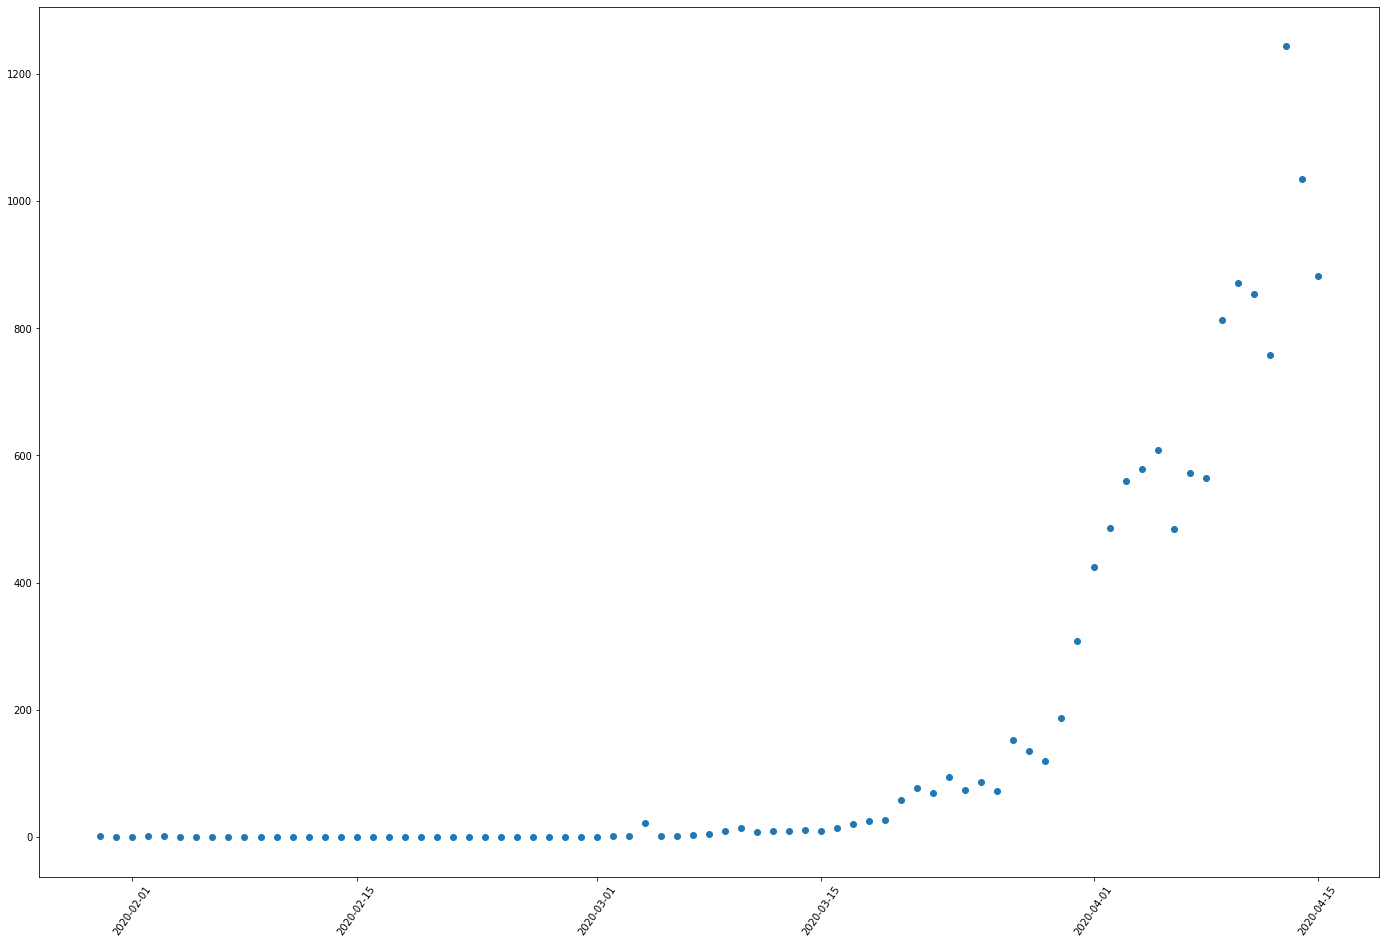

In [496]:
plt.figure(figsize=(24,16))
plt.tick_params(axis='x',labelrotation=55)
plt.scatter(df['DATE'],df['Daily_Confi'])

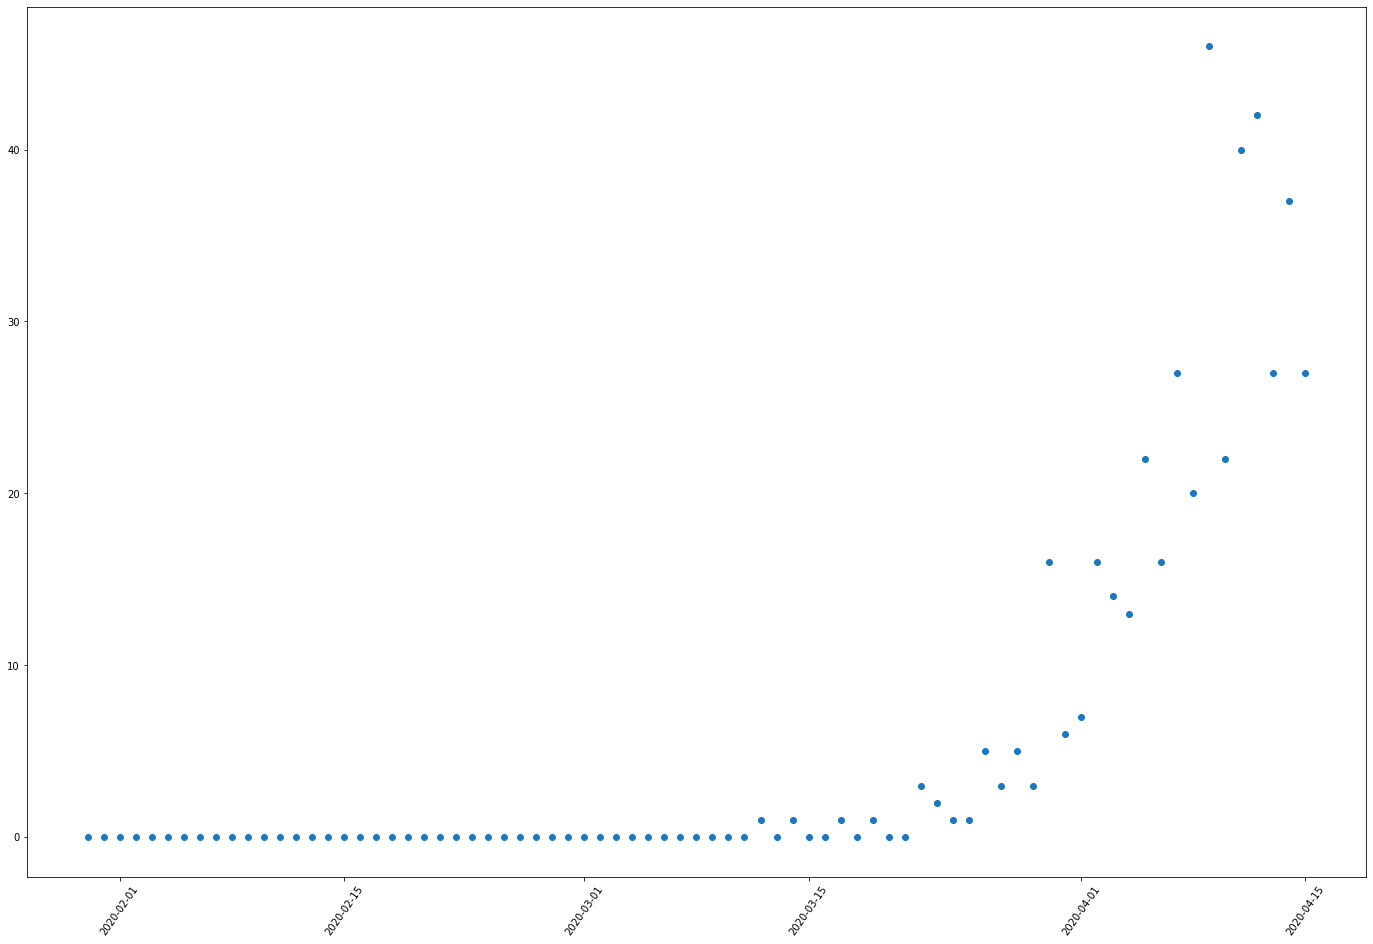

In [497]:
plt.figure(figsize=(24,16))
plt.tick_params(axis='x',labelrotation=55)
plt.scatter(df['DATE'],df['Daily_dead'])

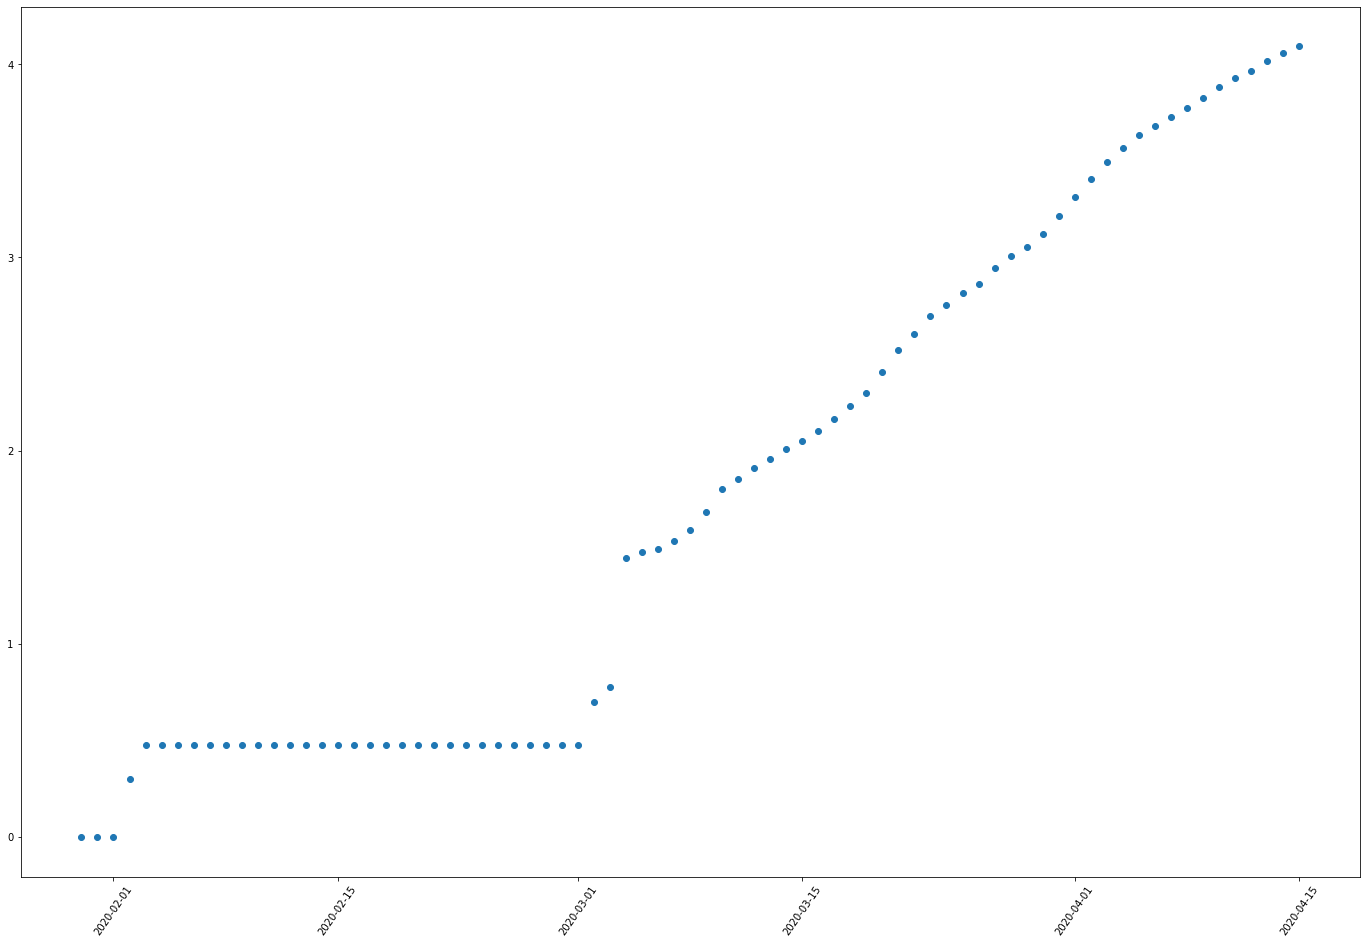

In [498]:
plt.figure(figsize=(24,16))
plt.tick_params(axis='x',labelrotation=55)
plt.scatter(df['DATE'],np.log10(df['Total_conf']))

In [499]:
df.columns

Index(['Unnamed: 0', 'DATE', 'Daily_Confi', 'Total_conf', 'Daily_recov',
       'Total_recov', 'Daily_dead', 'Total_dead'],
      dtype='object')

In [500]:
trace0 = go.Scatter(x = df.DATE, 
                    y = np.log10(df.Total_conf),
                   mode='markers',
                   marker = {'size':10,'color':'rgba(255,70,0,0.5)'},
                   name = 'Scatter Plot')
data = [trace0]

iplot({'data':data})

# COLORS

The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above

# COLORSCALE

Accent         Aggrnyl        Agsunset       Alphabet       Antique
Armyrose       Blackbody      Bluered        Blues          Blugrn
Bluyl          Bold           BrBG           Brwnyl         BuGn
BuPu           Burg           Burgyl         Cividis        D3
Dark2          Dark24         Darkmint       Earth          Edge
Electric       Emrld          Fall           G10            Geyser
GnBu           Greens         Greys          HSV            Hot
IceFire        Inferno        Jet            Light24        Magenta
Magma          Mint           OrRd           Oranges        Oryel
PRGn           Paired         Pastel         Pastel1        Pastel2
Peach          Phase          PiYG           Picnic         Pinkyl
Plasma         Plotly         Plotly3        Portland       Prism
PuBu           PuBuGn         PuOr           PuRd           Purp
Purples        Purpor         Rainbow        RdBu           RdGy
RdPu           RdYlBu         RdYlGn         Redor          Reds
Safe           Set1           Set2           Set3           Spectral
Sunset         Sunsetdark     T10            Teal           Tealgrn
Tealrose       Temps          Tropic         Twilight       Viridis
Vivid          YlGn           YlGnBu         YlOrBr         YlOrRd
algae          amp            balance        curl           deep
delta          dense          gray           haline         ice
matter         mrybm          mygbm          oxy            phase
scale_pairs    scale_sequence solar          speed          tempo
thermal        turbid

In [520]:
trace0 = go.Scatter(x = df.DATE,
                    y = df.Total_conf,
                    mode='markers',
                    marker = {'size':5 + (df.Total_conf/df.Total_conf.max())*25,
                             'color':'yellowgreen',
                             'colorscale':'PiYG',
                             'opacity':0.4,
                             'showscale':True},
                    showlegend=True,
                   name = 'Size Increases as Confirmed Increases(Absolute Value)')

trace1 = go.Scatter(x = df.DATE,
                    y = (df.Total_conf/df.Total_conf.max())*100,
                    mode='markers',
                    marker = {'size':(0.1 + df.Total_recov/df.Total_recov.max())*25,
                             'color':df.Daily_Confi,
                            'colorscale':'Rainbow',
                            'showscale':False},
                    showlegend=True,
                   name = 'Size Increases as Recovered Increases(Normalized Value)')

trace2 = go.Scatter(x = df.DATE,
                    y = (df.Total_conf/df.Total_conf.max())*1000,
                    mode='markers',
                    marker = {'size':(0.1 + df.Total_dead/df.Total_dead.max())*25,
                             'color':'hotpink',
                            'colorscale':'Twilight',
                            'showscale':False},
                    showlegend=True,
                   name = 'Size Increases as Dead Increases(Normalized Value)')

layout = {'title':'COVID19 Cases and Mortality in India',
         'xaxis':{'title':'Timeline for COVID19 cases',
                  'zeroline':False},
         'yaxis':{'title':'Total Cummulative Cases',
                  'zeroline':False},
         'legend':{'orientation':'v',
                   'itemsizing': 'constant',
                  'x':0,'y':1
                  },
          'hoverlabel':{'bgcolor':'white',
                       'font_size':16,
                       'font_family':'Rockwell',
                       'namelength':-1},
          'hovermode':'x unified'
         }
data = [trace0,trace1,trace2]

iplot({'data':data,'layout':layout})

In [521]:
trace0 = go.Scatter(x=df.DATE,
                    y=df.Total_conf,
                    mode='markers',
                    marker = {'size':np.log(1+df.Total_dead)*5,
                             'color':df.Daily_dead,
                             'colorscale':'Portland',
                             'showscale':True},
                    showlegend=False)

data = [trace0]
iplot({'data':data})

In [522]:
df4plot = pd.DataFrame(df.DATE,df.Total_conf)

Text(0, 0.5, 'Cummulative number of cases')

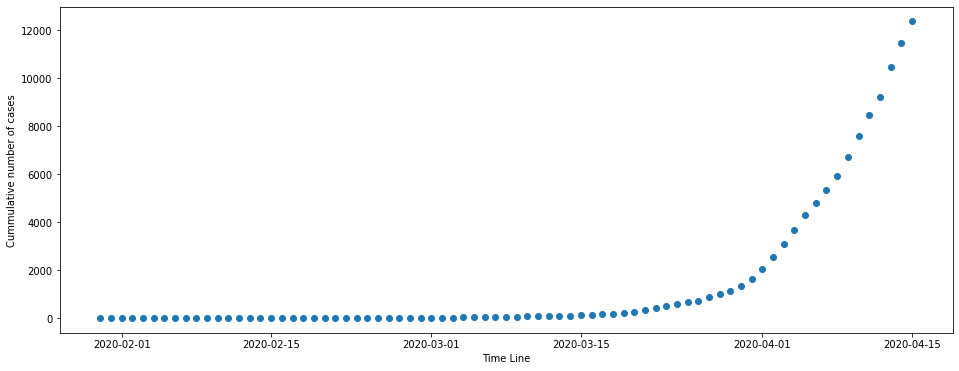

In [523]:
plt.figure(figsize=(16,6))
plt.scatter(x=df.DATE,y=df.Total_conf)
plt.xlabel('Time Line')
plt.ylabel('Cummulative number of cases')

In [630]:
statedata = pd.read_csv("statewise.csv")

In [635]:
statedata

,Sno,Date,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,Day_total
0,1.0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,162
1,2.0,14-Mar-20,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,18
2,3.0,14-Mar-20,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,4.0,15-Mar-20,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,54
4,5.0,15-Mar-20,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,14-Apr-20,Deceased,37,0,4,0,0,0,0,...,1,0,0,1,1,0,3,0,0,74
96,97.0,15-Apr-20,Confirmed,882,0,41,0,0,6,0,...,2,71,0,38,6,0,75,0,23,1764
97,98.0,15-Apr-20,Recovered,144,0,4,1,2,0,2,...,0,0,0,37,8,1,7,0,1,288
98,99.0,15-Apr-20,Deceased,27,0,3,0,0,0,0,...,0,0,0,2,0,0,3,0,0,54


In [632]:
statedata.columns

Index(['Sno', 'Date', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT',
       'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA',
       'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK',
       'TN', 'TG', 'TR', 'UP', 'UT', 'WB', 'Day_total'],
      dtype='object')

In [633]:
trace0 = go.Scatter(x=statedata.Date,
                    y=statedata.DL[statedata.Status == 'Confirmed'],
                    mode='markers',
                    marker = {'size':np.log(1+statedata.DL[statedata.Status == 'Deceased'])*5,
                             'color':'darkred',
                             'colorscale':'Portland',
                             'showscale':False},
                    showlegend=True,
                   name = 'Delhi')

trace1 = go.Scatter(x=statedata.Date,
                    y=statedata.MH[statedata.Status == 'Confirmed'],
                    mode='markers',
                    marker = {'size':np.log(1+statedata.MH[statedata.Status == 'Deceased'])*5,
                             'color':'black',
                             'colorscale':'Portland',
                             'showscale':False},
                    showlegend=True,
                   name = 'Maharashtra')

layout = {'title':'COVID19 Cases and Mortality in States of India',
         'xaxis':{'title':'Timeline for COVID19 cases',
                  'zeroline':False},
         'yaxis':{'title':'Total Daily Confirmed Cases',
                  'zeroline':False},
         'legend':{'orientation':'h',
                   'itemsizing': 'constant',
                  'x':0,'y':1.1
                  }
         }

data = [trace0,trace1]
iplot({'data':data,'layout':layout})

In [528]:
 aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

IndentationError: unexpected indent (<ipython-input-528-e9a013187815>, line 2)

In [529]:
statedata.DL[statedata.Status == 'Confirmed']

0       7
3       0
6       0
9       1
12      2
15      4
18      6
21      7
24      0
27      3
30      0
33      5
36      1
39      4
42      9
45     23
48     25
51     23
54     32
57    141
60     93
63     59
66     58
69     22
72     51
75     93
78     51
81    183
84    166
87     85
90    356
93     51
96     17
Name: DL, dtype: int64

In [530]:
dl_conf =  statedata[['DL','Date']][statedata.Status == 'Confirmed']
dl_recov = statedata[['DL','Date']][statedata.Status == 'Recovered']
dl_decea = statedata[['DL','Date']][statedata.Status == 'Deceased']

In [531]:
dl_conf.columns

Index(['DL', 'Date'], dtype='object')

In [532]:
df_dl = pd.concat([dl_conf,dl_recov,dl_decea],axis=1,ignore_index = True)
df_dl.rename(columns = {0:'Confirmed',1:'Date_C',2:'Recovered',3:'Date_R',4:'Deceased',5:'Date_D'}, inplace = True) 
df_dl.fillna(0,inplace=True)

In [533]:
df_dl

,Confirmed,Date_C,Recovered,Date_R,Deceased,Date_D
0,7.0,14-Mar-20,0.0,0,0.0,0
1,0.0,0,1.0,14-Mar-20,0.0,0
2,0.0,0,0.0,0,1.0,14-Mar-20
3,0.0,15-Mar-20,0.0,0,0.0,0
4,0.0,0,1.0,15-Mar-20,0.0,0
...,...,...,...,...,...,...
94,0.0,0,0.0,14-Apr-20,0.0,0
95,0.0,0,0.0,0,2.0,14-Apr-20
96,17.0,15-Apr-20,0.0,0,0.0,0
97,0.0,0,10.0,15-Apr-20,0.0,0


In [534]:
trace0 = go.Scatter(x = df_dl.Date_C,
                    y = np.log10(1+df_dl.Confirmed),
                    mode='markers',
                    marker = {'size':(0.1 + df_dl.Confirmed/df_dl.Confirmed.max())*35,
                             'color':(0.1 + df_dl.Confirmed/df_dl.Confirmed.max())*100,
                            'colorscale':'PiYG',
                            'showscale':True},
                    showlegend=True,
                   name = 'Total Confirmed Cases')

trace1 = go.Scatter(x = df_dl.Date_R,
                    y = np.log10(1+df_dl.Recovered),
                    mode='markers',
                    marker = {'size':(0.1 + df_dl.Recovered/df_dl.Recovered.max())*35,
                             'color':'black',
                            'colorscale':'Twilight',
                            'showscale':False},
                    showlegend=True,
                   name = 'Total Recovered Cases')

trace2 = go.Scatter(x = df_dl.Date_D,
                    y = np.log10(1+df_dl.Deceased),
                    mode='markers',
                    marker = {'size':0.1 + (df_dl.Deceased/df_dl.Deceased.max())*35,
                             'color':'darkred',
                             'colorscale':'Twilight',
                             'opacity':0.4,
                             'showscale':False},
                    showlegend=True,
                   name = 'Total Deceased Cases')
layout = {'title':'COVID19 Cases and Mortality in Delhi',
         'xaxis':{'title':'Timeline for COVID19 cases',
                  'zeroline':False},
         'yaxis':{'title':'No of Cases',
                  'zeroline':False},
         'legend':{'orientation':'h',
                   'itemsizing': 'constant',
                  'x':0,'y':1.1
                  },
          'hoverlabel':{'bgcolor':'white',
                       'font_size':16,
                       'font_family':'Rockwell',
                       'namelength':-1},
          'hovermode':'x unified'
         }
data = [trace0,trace1,trace2]

iplot({'data':data,'layout':layout})

In [629]:
statedata.columns

Index(['Sno', 'Date', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT',
       'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA',
       'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK',
       'TN', 'TG', 'TR', 'UP', 'UT', 'WB'],
      dtype='object')

In [536]:
df_dl['Total'] = df_dl['Confirmed'].cumsum()
y = df_dl[df_dl.Date_C !=0]['Total']
x = df_dl[df_dl.Date_C !=0]['Date_C']

In [537]:
trace0 = go.Scatter(x = x,
                    y = y,
                    mode='markers',
                    marker = {'size':(0.1 + y/y.max())*35,
                             'color':(0.1 + y/y.max())*100,
                            'colorscale':'rainbow',
                            'showscale':True},
                    showlegend=True,
                   name = 'Total Confirmed Cases')

trace1 = go.Scatter(x = df_dl.Date_C,
                    y = df_dl.Confirmed,
                    mode='markers',
                    marker = {'size':(0.1 + df_dl.Confirmed/df_dl.Confirmed.max())*35,
                             'color':(0.1 + df_dl.Confirmed/df_dl.Confirmed.max())*100,
                            'colorscale':'PiYG',
                            'showscale':True},
                    showlegend=True,
                   name = 'Daily Confirmed Cases')

trace2 = go.Scatter(x = df_dl.Date_R,
                    y = df_dl.Recovered,
                    mode='markers',
                    marker = {'size':(0.1 + df_dl.Recovered/df_dl.Recovered.max())*35,
                             'color':'black',
                            'colorscale':'Twilight',
                            'showscale':False},
                    showlegend=True,
                   name = 'Daily Recovered Cases')

trace3 = go.Scatter(x = df_dl.Date_D,
                    y = df_dl.Deceased,
                    mode='markers',
                    marker = {'size':0.1 + (df_dl.Deceased/df_dl.Deceased.max())*35,
                             'color':'darkred',
                             'colorscale':'Twilight',
                             'opacity':0.4,
                             'showscale':False},
                    showlegend=True,
                   name = 'Daily Deceased Cases')

layout = {'title':'COVID19 Cases and Mortality in Delhi',
         'xaxis':{'title':'Timeline for COVID19 cases',
                  'zeroline':False},
         'yaxis':{'title':'No of Cases',
                  'zeroline':False},
         'legend':{'orientation':'h',
                   'itemsizing': 'constant',
                  'x':0,'y':1.1
                  },
          'hoverlabel':{'bgcolor':'white',
                       'font_size':16,
                       'font_family':'Rockwell',
                       'namelength':-1},
          'hovermode':'x unified'
         }
data = [trace0,trace1,trace2,trace3]

iplot({'data':data,'layout':layout})

In [464]:
df_dl['Total'] = df_dl['Confirmed'].cumsum()

,Confirmed,Date_C,Recovered,Date_R,Deceased,Date_D,Total
0,7.0,14-Mar-20,0.0,0,0.0,0,7.0
1,0.0,0,1.0,14-Mar-20,0.0,0,7.0
2,0.0,0,0.0,0,1.0,14-Mar-20,7.0
3,0.0,15-Mar-20,0.0,0,0.0,0,7.0
4,0.0,0,1.0,15-Mar-20,0.0,0,7.0
5,0.0,0,0.0,0,0.0,15-Mar-20,7.0
6,0.0,16-Mar-20,0.0,0,0.0,0,7.0
7,0.0,0,0.0,16-Mar-20,0.0,0,7.0
8,0.0,0,0.0,0,0.0,16-Mar-20,7.0
9,1.0,17-Mar-20,0.0,0,0.0,0,8.0


In [593]:
indian_cities = pd.read_csv('India_Geo.csv')

In [594]:
indian_cities.columns

Index(['State', 'Location', 'Latitude', 'Longitude', 'PINcode'], dtype='object')

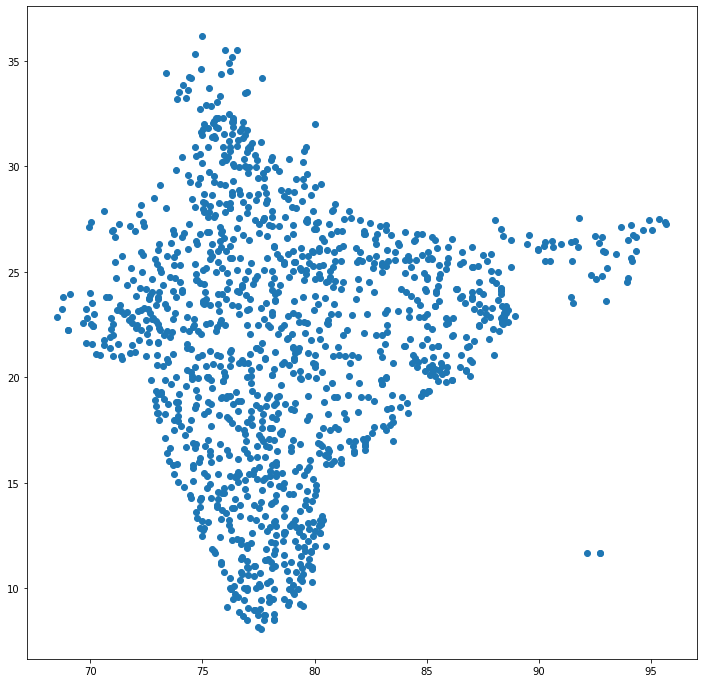

In [595]:
plt.figure(figsize=(12,12))
plt.scatter(indian_cities.Longitude,indian_cities.Latitude)

In [620]:
import plotly.express as px

fig = px.scatter_mapbox(indian_cities, lat=indian_cities.Latitude, lon=indian_cities.Longitude, 
                        hover_name=indian_cities.Location,hover_data=[indian_cities.State, indian_cities.PINcode],
                        color_discrete_sequence=["orangered"], zoom=3, height=400)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [621]:
fused_df = pd.read_csv("fusedData.csv")

In [622]:
fused_df

,State,StateCode,Longitude,Latitude,Confirmed,Active,Recovered,Deceased,Tested
0,Andaman and Nicobar,AN,92.889579,11.942373,NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,AP,79.916203,16.554124,NaN,NaN,NaN,NaN,NaN
2,Arunachal Pradesh,AR,94.545327,27.725765,NaN,NaN,NaN,NaN,NaN
3,Assam,AS,92.657310,26.321341,NaN,NaN,NaN,NaN,NaN
4,Bihar,BR,85.636774,25.771394,NaN,NaN,NaN,NaN,NaN
5,Chandigarh,CH,76.758725,30.742600,NaN,NaN,NaN,NaN,NaN
6,Chhattisgarh,CT,82.125093,21.555739,NaN,NaN,NaN,NaN,NaN
7,Dadra and Nagar Haveli,DN,73.094550,20.215132,NaN,NaN,NaN,NaN,NaN
8,Delhi,DL,77.128045,28.645944,NaN,NaN,NaN,NaN,NaN
9,Goa,GA,73.866016,15.393504,NaN,NaN,NaN,NaN,NaN


In [ ]:
statedata = statedata[:-1]

In [ ]:
fused_df.set_index('StateCode',inplace=True)

In [659]:
fused_df

,State,Longitude,Latitude,Confirmed,Active,Recovered,Deceased,Tested
StateCode,,,,,,,,
AN,Andaman and Nicobar,92.889579,11.942373,NaN,NaN,NaN,NaN,NaN
AP,Andhra Pradesh,79.916203,16.554124,NaN,NaN,NaN,NaN,NaN
AR,Arunachal Pradesh,94.545327,27.725765,NaN,NaN,NaN,NaN,NaN
AS,Assam,92.657310,26.321341,NaN,NaN,NaN,NaN,NaN
BR,Bihar,85.636774,25.771394,NaN,NaN,NaN,NaN,NaN
CH,Chandigarh,76.758725,30.742600,NaN,NaN,NaN,NaN,NaN
CT,Chhattisgarh,82.125093,21.555739,NaN,NaN,NaN,NaN,NaN
DN,Dadra and Nagar Haveli,73.094550,20.215132,NaN,NaN,NaN,NaN,NaN
DL,Delhi,77.128045,28.645944,NaN,NaN,NaN,NaN,NaN


In [663]:
DL = statedata.DL[statedata.Status == "Confirmed"].sum()
DL

1578

In [667]:
fused_df.loc['DL','Confirmed'] = statedata.DL[statedata.Status == "Confirmed"].sum()

In [679]:
len(statedata.columns)

42

In [677]:
fused_df.index[0]

'AN'

In [683]:
for i in range(0,len(statedata.columns)):
    for j in range(0,len(fused_df.index)):
        if fused_df.index[j] == statedata.columns[i]:
            fused_df.loc[fused_df.index[j],'Confirmed'] = statedata[statedata.columns[i]][statedata.Status == "Confirmed"].sum()

for i in range(0,len(statedata.columns)):
    for j in range(0,len(fused_df.index)):
        if fused_df.index[j] == statedata.columns[i]:
            fused_df.loc[fused_df.index[j],'Active'] = statedata[statedata.columns[i]][statedata.Status == "Active"].sum()
            
for i in range(0,len(statedata.columns)):
    for j in range(0,len(fused_df.index)):
        if fused_df.index[j] == statedata.columns[i]:
            fused_df.loc[fused_df.index[j],'Recovered'] = statedata[statedata.columns[i]][statedata.Status == "Recovered"].sum()
            
for i in range(0,len(statedata.columns)):
    for j in range(0,len(fused_df.index)):
        if fused_df.index[j] == statedata.columns[i]:
            fused_df.loc[fused_df.index[j],'Deceased'] = statedata[statedata.columns[i]][statedata.Status == "Deceased"].sum()
            
for i in range(0,len(statedata.columns)):
    for j in range(0,len(fused_df.index)):
        if fused_df.index[j] == statedata.columns[i]:
            fused_df.loc[fused_df.index[j],'Tested'] = statedata[statedata.columns[i]][statedata.Status == "Tested"].sum()

In [684]:
fused_df

,State,Longitude,Latitude,Confirmed,Active,Recovered,Deceased,Tested
StateCode,,,,,,,,
AN,Andaman and Nicobar,92.889579,11.942373,11.0,0.0,10.0,0.0,0.0
AP,Andhra Pradesh,79.916203,16.554124,525.0,0.0,20.0,11.0,0.0
AR,Arunachal Pradesh,94.545327,27.725765,1.0,0.0,1.0,0.0,0.0
AS,Assam,92.657310,26.321341,32.0,0.0,2.0,1.0,0.0
BR,Bihar,85.636774,25.771394,72.0,0.0,29.0,1.0,0.0
CH,Chandigarh,76.758725,30.742600,21.0,0.0,9.0,0.0,0.0
CT,Chhattisgarh,82.125093,21.555739,33.0,0.0,17.0,0.0,0.0
DN,Dadra and Nagar Haveli,73.094550,20.215132,1.0,0.0,0.0,0.0,0.0
DL,Delhi,77.128045,28.645944,1578.0,0.0,41.0,30.0,0.0


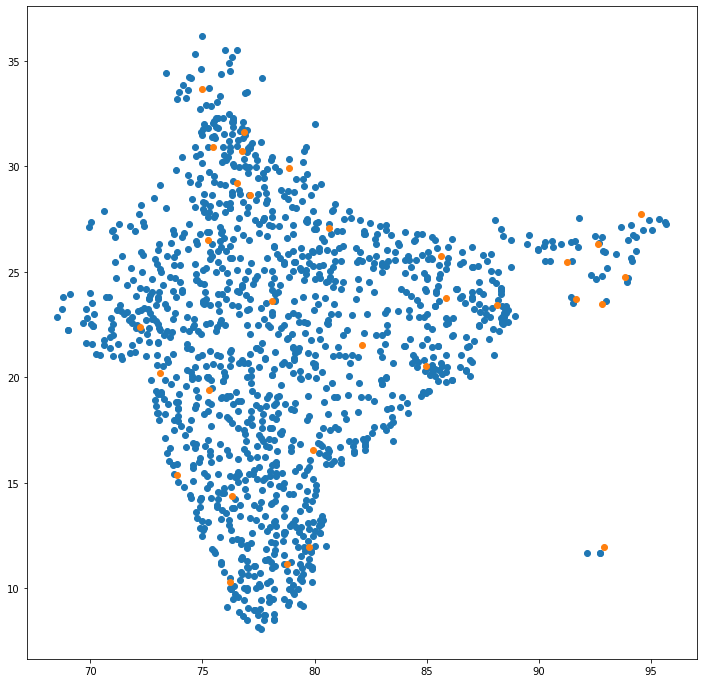

In [685]:
plt.figure(figsize=(12,12))
plt.scatter(indian_cities.Longitude,indian_cities.Latitude)
plt.scatter(fused_df.Longitude,fused_df.Latitude,cmap='red')

In [728]:
import plotly.express as px

fig = px.scatter_mapbox(indian_cities, lat=indian_cities.Latitude, lon=indian_cities.Longitude, 
                        hover_name=indian_cities.Location,hover_data=[indian_cities.State, indian_cities.PINcode],
                        color_discrete_sequence=["orangered"], zoom=3, height=400)


fig = px.scatter_mapbox(fused_df, lat=fused_df.Latitude, lon=fused_df.Longitude, 
                        hover_name=fused_df.State,hover_data=[fused_df.Confirmed, fused_df.Deceased],
                        color_discrete_sequence=["orangered"], zoom=3, height=400)


fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [740]:
trace0 = go.Scatter(y = indian_cities.Latitude,
                    x = indian_cities.Longitude,
                    mode='markers',
                    marker = {'size':5,
                             'color':'black'},
                    orientation ='v',
                    showlegend=True,
                   name = 'Indian Cities')
trace1 = go.Scatter(y = fused_df.Latitude,
                    x = fused_df.Longitude,
                    mode='markers',
                    marker = {'size':np.log2(1+fused_df.Confirmed),
                             'color':'red',
                            'showscale':False},
                    orientation='v',
                    hoverinfo='all',
                    showlegend=True,
                   name = 'Confirmed COVID19 Cases')

layout = {'title':'COVID19 Cases Mapped over different regions of India',
          'width':600,
          'height':600,
         'xaxis':{'title':'Latitude',
                  'zeroline':False},
         'yaxis':{'title':'Longitude',
                  'zeroline':False},
         'legend':{'orientation':'h',
                   'itemsizing': 'constant',
                  'x':0,'y':1.1
                  },
         'hoverlabel':{'bgcolor':'white',
                       'font_size':16,
                       'font_family':'Rockwell',
                       'namelength':-1},
         'hovermode':'x unified'
         }

data = [trace0,trace1]

iplot({'data':data,'layout':layout})

In [741]:
fig = go.Figure(layout={'height':600,
                       'width':600})
fig.add_trace(go.Scatter(y = indian_cities.Latitude,
                    x = indian_cities.Longitude,
                    mode='markers',
                    marker = {'size':10,
                             'color':'darkred',
                             'opacity':0.4,
                             },
                    showlegend=True,
                    name = 'Latitude',
                    orientation='v'))

fig.add_trace(go.Scatter(y = fused_df.Latitude,
                    x = fused_df.Longitude,
                    mode='markers',
                    marker = {'size':10,
                             'color':'darkred',
                             'opacity':0.4,
                             },
                    showlegend=True,
                    name = 'Longitude',
                    orientation='v'))

fig.update_layout(
    title = "COVID19 Cases mapped over the regions of India",
    #xaxis_range = [0,5.2],
    #yaxis_range = [0,3]
)

fig.show()